<a href="https://colab.research.google.com/github/emirabiyyu/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Emir Abiyyu Dellanggra

> NIM : 2241720197

> Kelas : TI-3F


---

# Tugas Praktikum - Histogram, Histogram Equalization, dan Dithering




In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## Membuat Histogram Citra berdasarkan Flowchart menggunakan gambar Lena

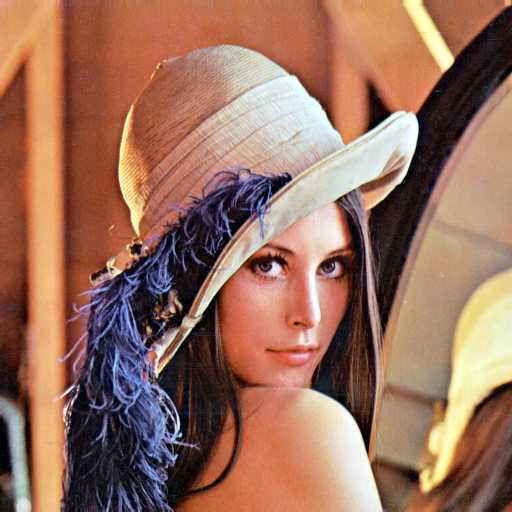

In [ ]:
img = cv.imread('/content/drive/MyDrive/S5_PCVK/Assets/lena.jpg')
cv2_imshow(img)

In [ ]:
# Split into RGB channels
channels = cv.split(img)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

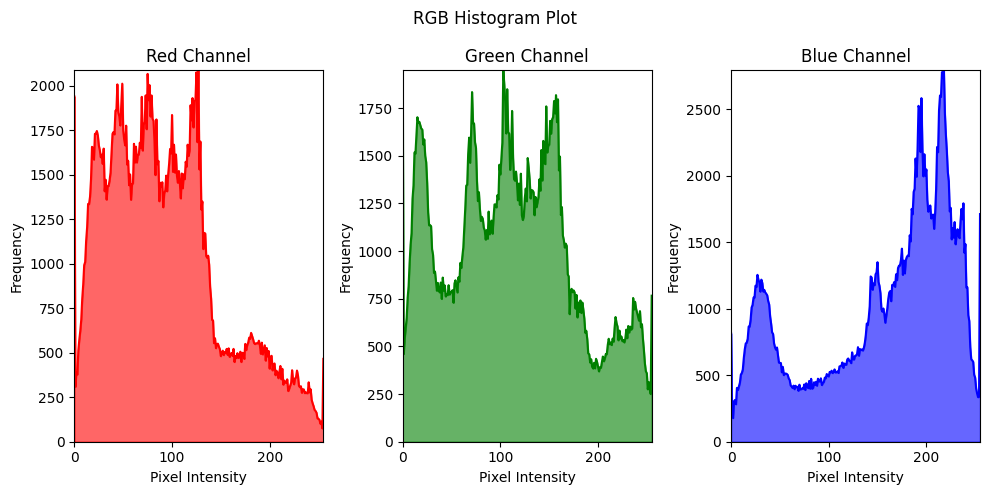

In [ ]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram = [0] * 256

    # Count the occurrences of each pixel intensity
    for row in channel:
        for pixel in row:
            histogram[pixel] += 1

    plt.subplot(1, 3, i + 1)
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram, color=color, alpha=0.6)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

## Lakukan hal yang sama menggunakan np.histogram

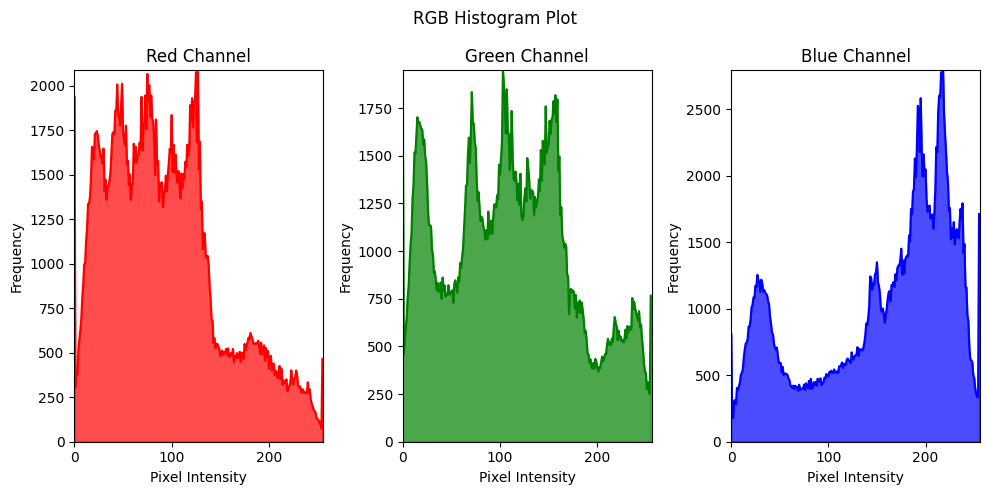

In [ ]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 256))

    # Plot the histogram
    plt.subplot(1, 3, i + 1)
    plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.fill_between(bin_edges[0:-1], histogram, color=color, alpha=0.7)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

Tidak ada perbedaan yang signifikan.

## Membuat histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berdasarkan flowchart menggunakan gambar lena_lc

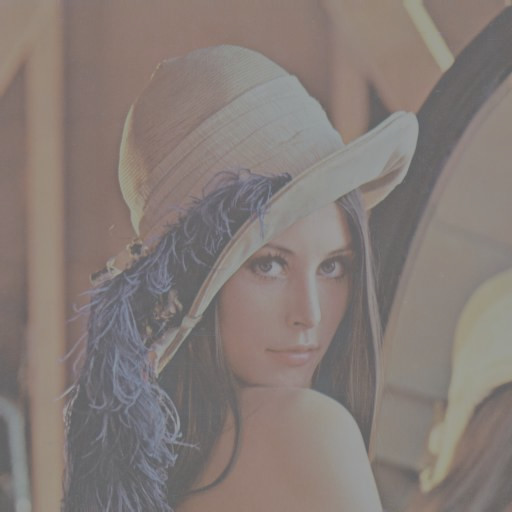

In [ ]:
image = cv.imread('/content/drive/MyDrive/S5_PCVK/Assets/lena_lc.jpg')
cv2_imshow(image)

In [ ]:
colors = ('r', 'g', 'b')
original_histograms = {}
for i, color in enumerate(colors):
    original_histograms[color] = [0] * 256
    for row in image[:,:,i]:
        for pixel in row:
            original_histograms[color][pixel] += 1

yuv_image = cv.cvtColor(image, cv.COLOR_RGB2YUV)
yuv_image[:,:,0] = cv.equalizeHist(yuv_image[:,:,0])  # Equalize the Y (luminance) channel
equalized_image = cv.cvtColor(yuv_image, cv.COLOR_YUV2RGB)

equalized_histograms = {}
for i, color in enumerate(colors):
    equalized_histograms[color] = [0] * 256
    for row in equalized_image[:,:,i]:
        for pixel in row:
            equalized_histograms[color][pixel] += 1

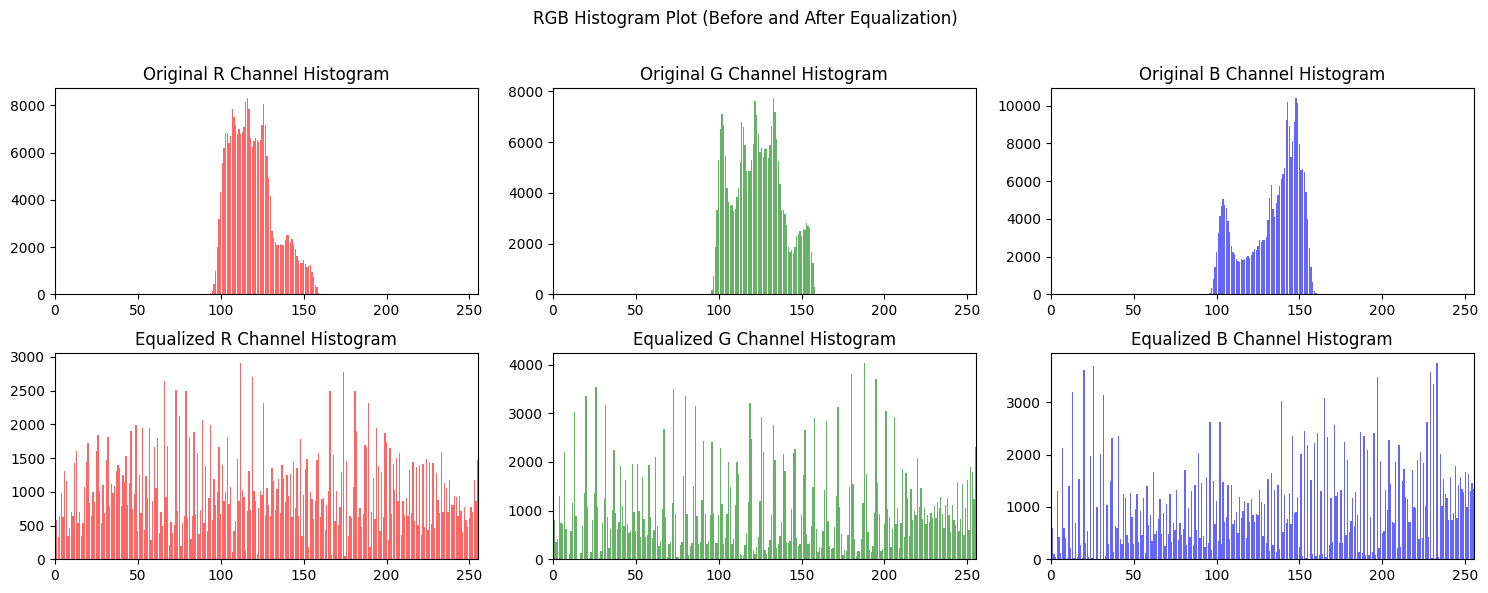

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Display original histograms
for i, color in enumerate(colors):
    axes[0, i].bar(range(256), original_histograms[color], color=color, alpha=0.6)
    axes[0, i].set_xlim([0, 255])
    axes[0, i].set_title(f'Original {color.upper()} Channel Histogram')

# Display equalized histograms
for i, color in enumerate(colors):
    axes[1, i].bar(range(256), equalized_histograms[color], color=color, alpha=0.6)
    axes[1, i].set_xlim([0, 255])
    axes[1, i].set_title(f'Equalized {color.upper()} Channel Histogram')

# Set overall titles and layout
plt.suptitle('RGB Histogram Plot (Before and After Equalization)')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

## Lakukan hal yang sama menggunakan cv2.equalizeHist

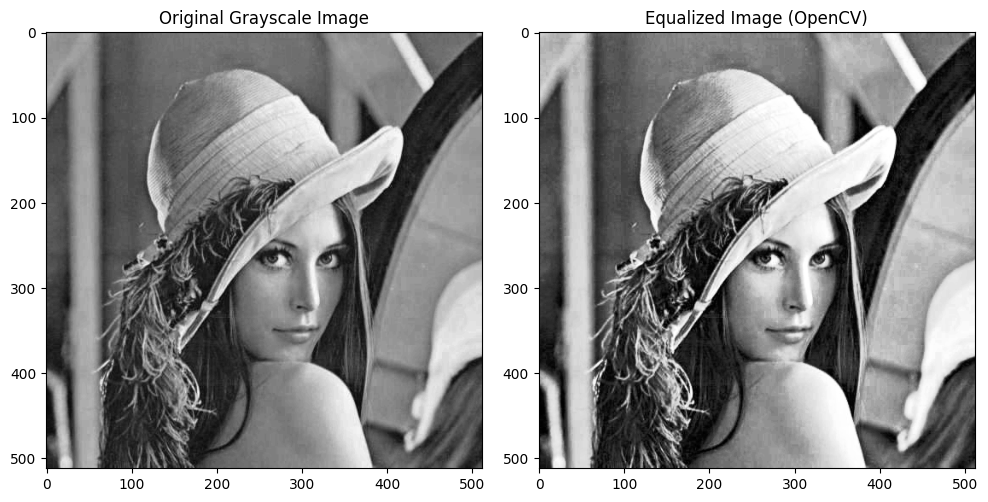

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

equalized_image_cv2 = cv.equalizeHist(gray_image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original grayscale image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')

# Display OpenCV equalized image
axes[1].imshow(equalized_image_cv2, cmap='gray')
axes[1].set_title('Equalized Image (OpenCV)')

plt.tight_layout()
plt.show()

Pada equalizeHist terlihat lebih banyak noise.

## Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih, berdasarkan flowchart menggunakan gambar lena

In [ ]:
img = cv.imread('/content/drive/MyDrive/S5_PCVK/Assets/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

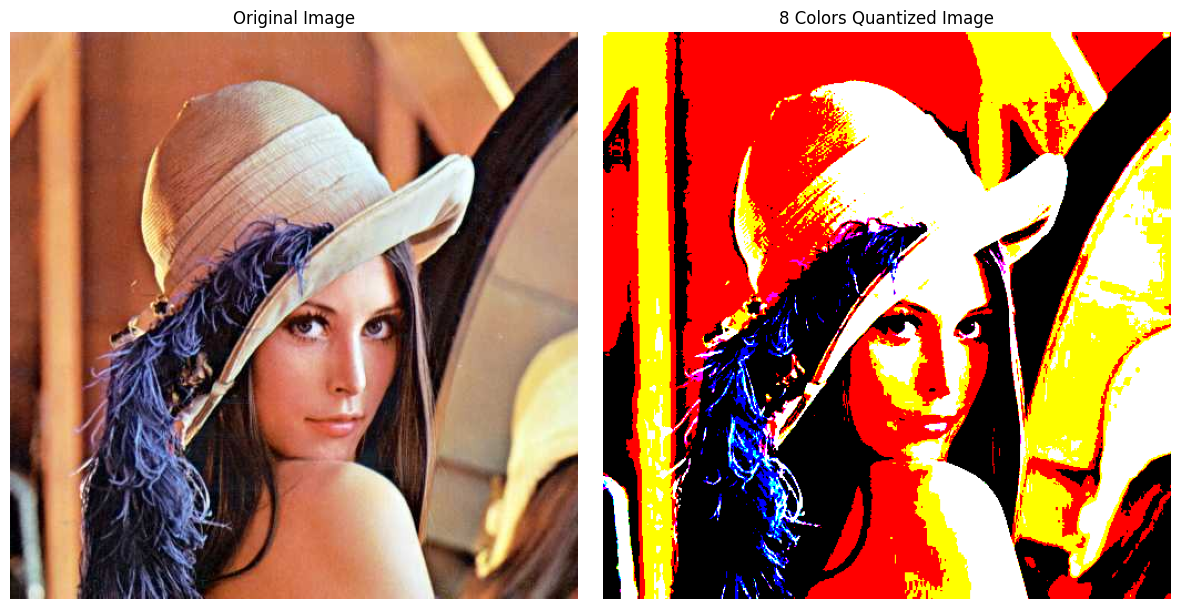

In [ ]:
from PIL import Image

def map_color(r, g, b):
    threshold = 128
    r_bit = 1 if r > threshold else 0
    g_bit = 1 if g > threshold else 0
    b_bit = 1 if b > threshold else 0
    color_index = (r_bit << 2) | (g_bit << 1) | b_bit
    color_map = {
        0: (0, 0, 0),      # Black
        1: (0, 0, 255),    # Blue
        2: (0, 255, 0),    # Green
        3: (0, 255, 255),  # Cyan
        4: (255, 0, 0),    # Red
        5: (255, 0, 255),  # Magenta
        6: (255, 255, 0),  # Yellow
        7: (255, 255, 255) # White
    }
    return color_map[color_index]

def quantize_image(img):
    img_array = np.array(img)
    output_array = np.zeros_like(img_array)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            r, g, b = img_array[i, j]
            output_array[i, j] = map_color(r, g, b)
    return Image.fromarray(output_array.astype('uint8'), 'RGB')

quantized_image = quantize_image(img)

# Plotting
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Quantized image (8 colors)
plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('8 Colors Quantized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Melakukan proses dithering Floyd and Steinberg berdasarkan flowchart menggunakan gambar lena

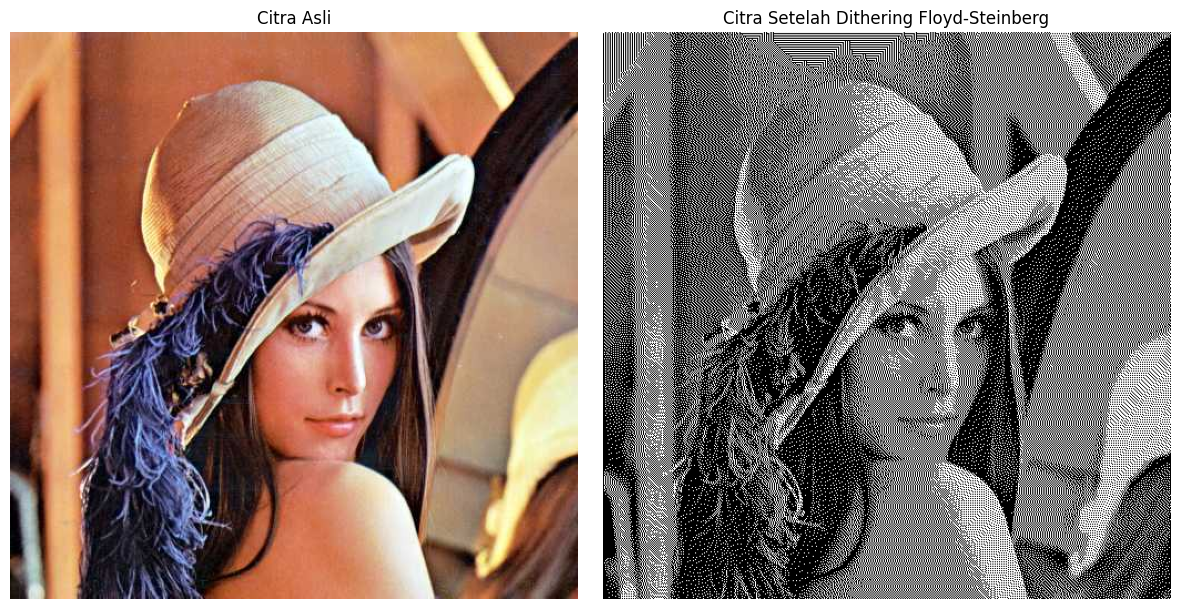

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def floyd_steinberg_dithering(image):
    # Mengonversi citra ke grayscale
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Mendapatkan dimensi citra
    height, width = img_gray.shape

    # Menciptakan citra baru untuk menyimpan hasil dithering
    img_dithered = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = img_gray[y, x]
            new_pixel = 255 * (old_pixel // 255)  # Membulatkan ke 0 atau 255
            img_dithered[y, x] = new_pixel

            # Menghitung kesalahan
            error = old_pixel - new_pixel

            # Distribusi kesalahan
            if x + 1 < width:
                img_gray[y, x + 1] = min(255, max(0, img_gray[y, x + 1] + error * 7 / 16))
            if x - 1 >= 0 and y + 1 < height:
                img_gray[y + 1, x - 1] = min(255, max(0, img_gray[y + 1, x - 1] + error * 3 / 16))
            if y + 1 < height:
                img_gray[y + 1, x] = min(255, max(0, img_gray[y + 1, x] + error * 5 / 16))
            if x + 1 < width and y + 1 < height:
                img_gray[y + 1, x + 1] = min(255, max(0, img_gray[y + 1, x + 1] + error * 1 / 16))

    return img_dithered

dithered_image = floyd_steinberg_dithering(img)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Gambar Setelah Dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_image, cmap='gray')
plt.title('Citra Setelah Dithering Floyd-Steinberg')
plt.axis('off')

plt.tight_layout()
plt.show()

## Menggunakan gambar lena_lc menjadi grey image, kemudian menerapkan histogram equalization lalu mengimplementasi proses dithering Floyd and Steinberg

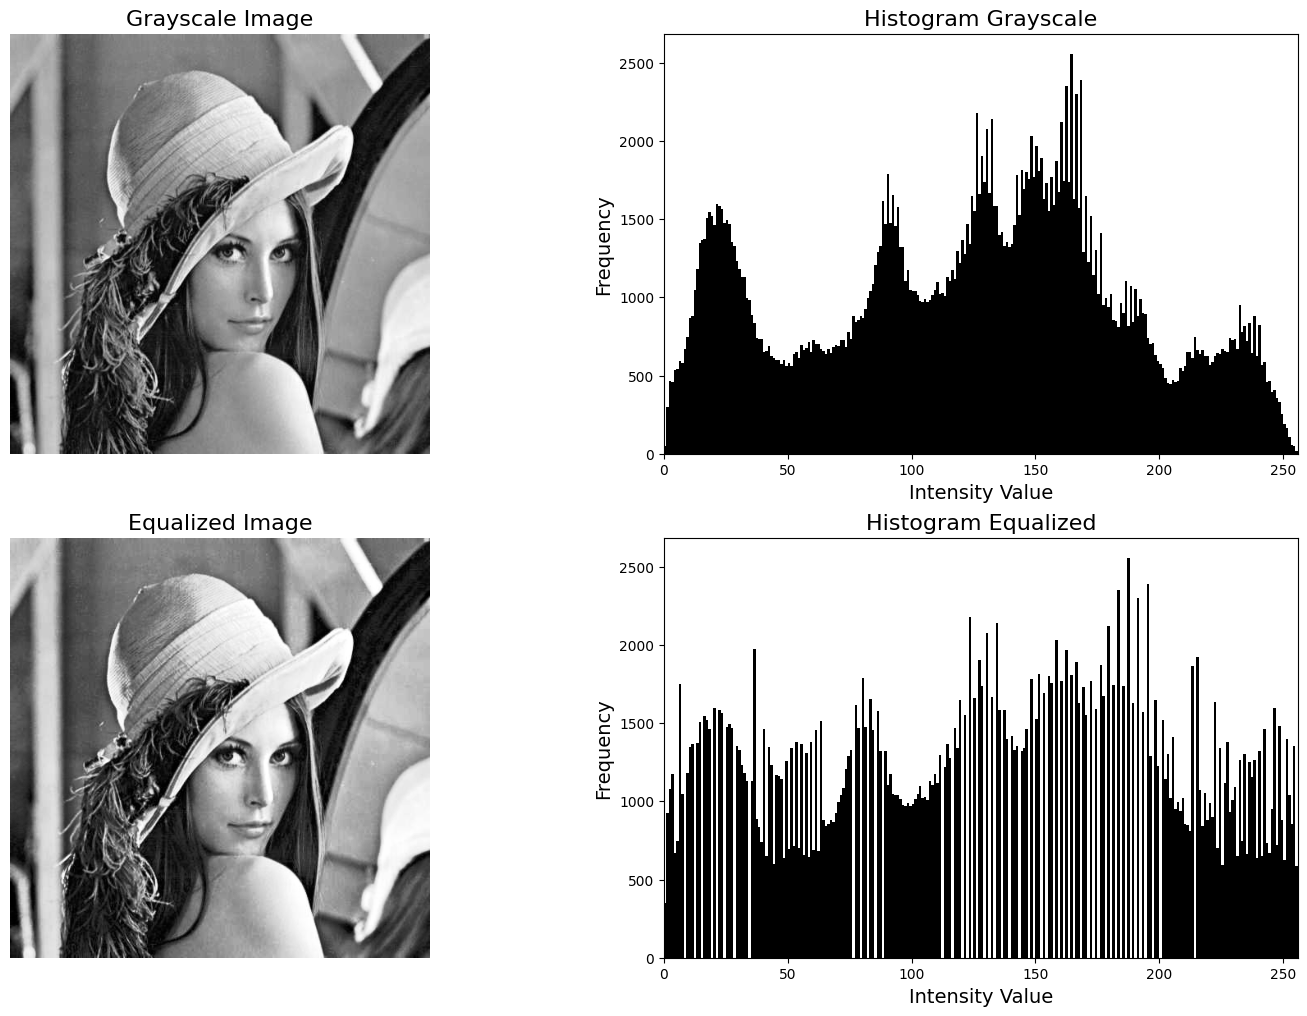

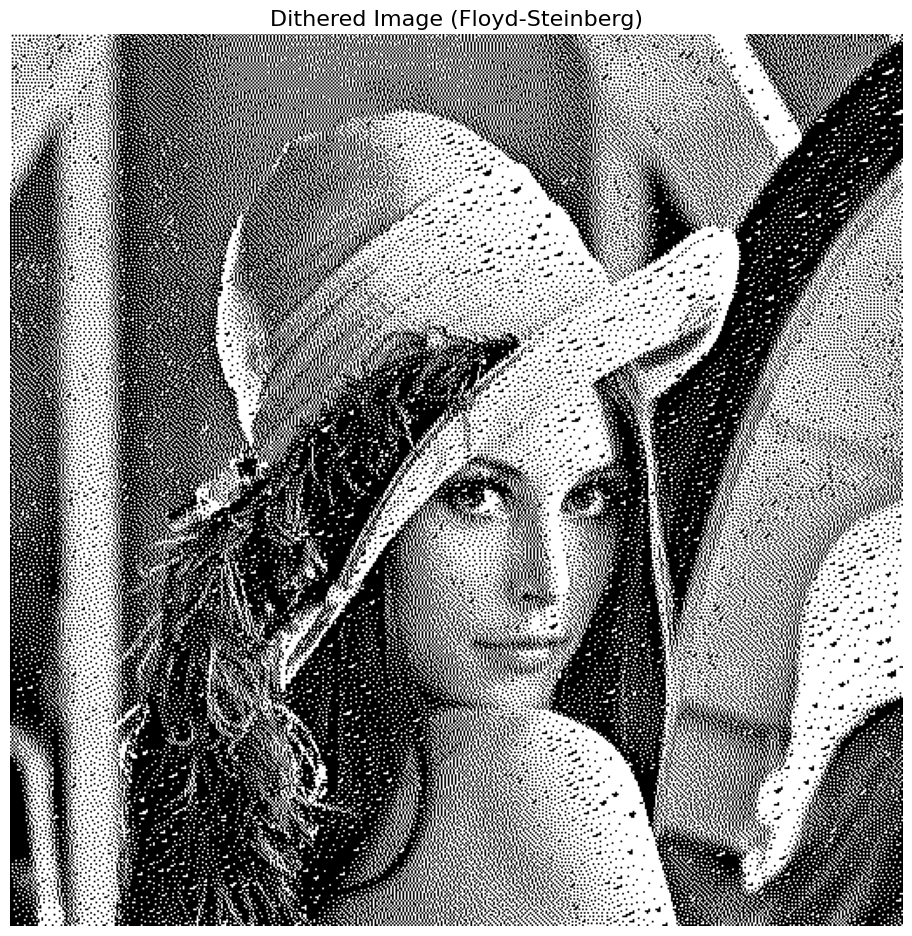

In [ ]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

equalized_image = cv.equalizeHist(gray_image)

def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered_image = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel // 128)  # Thresholding
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < w:
                image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < h:
                image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < h:
                image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < w and y + 1 < h:
                image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered_image

# Menerapkan dithering Floyd-Steinberg
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# Menampilkan hasil dengan layout yang rapi
plt.figure(figsize=(18, 12))

# Gambar Grayscale dan Histogram
plt.subplot(2, 2, 1)
plt.title("Grayscale Image", fontsize=16)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram Grayscale", fontsize=16)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Equalized dan Histogram
plt.subplot(2, 2, 3)
plt.title("Equalized Image", fontsize=16)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram Equalized", fontsize=16)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.xlim([0, 256])
plt.xlabel("Intensity Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Gambar Dithered
plt.figure(figsize=(10, 10))
plt.title("Dithered Image (Floyd-Steinberg)", fontsize=16)
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.tight_layout(pad=3.0)  # Mengatur tata letak agar tidak tumpang tindih
plt.show()